<a href="https://colab.research.google.com/github/Sarthak100900/Daa/blob/main/StockMarkectPredictionDeepLearning(DEEPAKNTR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math

In [28]:
from google.colab import drive


In [29]:
df = pd.read_csv('DEEPAKNTR.NS.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-17,170.000000,170.399994,165.550003,166.199997,162.416748,211407
1,2017-07-18,165.000000,167.500000,162.000000,163.500000,159.778229,114289
2,2017-07-19,163.500000,167.399994,163.000000,164.449997,160.706589,59189
3,2017-07-20,165.399994,167.449997,163.449997,164.899994,161.146347,380078
4,2017-07-21,165.899994,172.500000,163.500000,171.350006,167.449524,548223


In [30]:
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
1232,2022-07-11,1773.000000,1848.800049,1764.000000,1834.400024,1834.400024,843492
1233,2022-07-12,1840.000000,1843.000000,1803.000000,1810.949951,1810.949951,633840
1234,2022-07-13,1850.000000,1850.000000,1813.000000,1815.949951,1815.949951,658945
1235,2022-07-14,1818.949951,1829.750000,1761.550049,1773.300049,1773.300049,539472
1236,2022-07-15,1784.400024,1786.949951,1740.500000,1751.150024,1751.150024,446939


In [31]:
df1=df.reset_index()['Close']
df1.shape
df1

0        166.199997
1        163.500000
2        164.449997
3        164.899994
4        171.350006
           ...     
1232    1834.400024
1233    1810.949951
1234    1815.949951
1235    1773.300049
1236    1751.150024
Name: Close, Length: 1237, dtype: float64

Text(0, 0.5, 'stock prices')

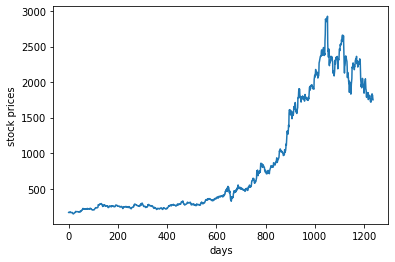

In [32]:
plt.plot(df1)
plt.xlabel("days")
plt.ylabel("stock prices")

In [33]:
#transforming the data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape


(1237, 1)

In [34]:
df1

array([[0.00739142],
       [0.00642029],
       [0.00676198],
       ...,
       [0.60077332],
       [0.585433  ],
       [0.57746609]])

In [35]:
#splitting datset into train and test data
training_size=int(len(df1)*0.65)
testing_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [36]:
len(train_data),len(test_data)


(804, 433)

In [40]:
import  numpy
# convert he array of values into the dataset matrix 
def create_dataset(dataset, time_step = 1 ):
          dataX, dataY =[],[]
          for i in range(len(dataset)- time_step-1):
            a = dataset[i:(i+time_step),0]
            dataX.append(a)
            dataY.append(dataset[i+ time_step, 0])
          return numpy.array(dataX), numpy.array(dataY) 
        

In [42]:
#reshaping the data as X=t,t+1,t+2 and Y=t+4
time_step=100
X_train, Y_train= create_dataset(train_data, time_step)
X_test, Y_test= create_dataset(test_data, time_step)

In [43]:
print(X_train.shape) ,print(Y_train.shape)


(703, 100)
(703,)


(None, None)

In [44]:
print(X_test.shape), print(Y_test.shape)


(332, 100)
(332,)


(None, None)

In [46]:
#reshaping data for LSTM in 3D [samples,time_steps,features]
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [47]:
#creating our Staxked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 10s 318ms/step - loss: 0.0030 - val_loss: 0.1833
Epoch 2/100
11/11 [==============================] - 2s 200ms/step - loss: 0.0011 - val_loss: 0.0051
Epoch 3/100
11/11 [==============================] - 2s 194ms/step - loss: 3.1712e-04 - val_loss: 0.0505
Epoch 4/100
11/11 [==============================] - 2s 198ms/step - loss: 2.1022e-04 - val_loss: 0.0052
Epoch 5/100
11/11 [==============================] - 2s 219ms/step - loss: 1.6510e-04 - val_loss: 0.0173
Epoch 6/100
11/11 [==============================] - 3s 287ms/step - loss: 1.4690e-04 - val_loss: 0.0077
Epoch 7/100
11/11 [==============================] - 3s 241ms/step - loss: 1.4207e-04 - val_loss: 0.0090
Epoch 8/100
11/11 [==============================] - 2s 201ms/step - loss: 1.4071e-04 - val_loss: 0.0044
Epoch 9/100
11/11 [==============================] - 2s 196ms/step - loss: 1.3568e-04 - val_loss: 0.0033
Epoch 10/100
11/11 [==============================] - 2s 199ms

In [50]:
#prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [51]:
#transform back to original form----inverse tranformation
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [52]:
#RMSE performance metrics
#train data RMSE
math.sqrt(mean_squared_error(Y_train,train_predict))

377.7779640522919

In [ ]:
#test data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

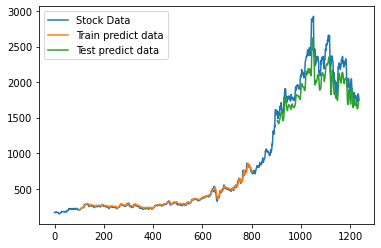

In [54]:
#plotting the growth

#shifting train for plotting
import numpy
lookback=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[lookback:len(train_predict)+lookback,:]=train_predict

#shfting test for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(lookback*2)+1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1),label='Stock Data')
plt.plot(trainPredictPlot,label='Train predict data')
plt.plot(testPredictPlot,label='Test predict data')
plt.legend()
plt.show()

In [56]:
len(test_data)

433

In [55]:
x_input=test_data[333:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

In [58]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5599407]
101
1 day input [0.6592573  0.67215182 0.61494471 0.66573154 0.66663074 0.64598511
 0.65794446 0.63593203 0.60606064 0.62668827 0.65785454 0.67134254
 0.68519017 0.74165991 0.73899832 0.74712712 0.74930311 0.76401407
 0.75885263 0.74629984 0.75342152 0.74910536 0.72955672 0.74629984
 0.74484312 0.75464439 0.77502022 0.77980398 0.78440791 0.78543303
 0.78424607 0.79710462 0.77041639 0.75985975 0.77395919 0.76376231
 0.74300871 0.74601208 0.77158535 0.76708935 0.75926632 0.76908551
 0.75912239 0.76854599 0.78444391 0.77426495 0.77057823 0.72471904
 0.67725926 0.66628902 0.64359323 0.65620002 0.63776643 0.66100174
 0.65898754 0.68569378 0.67995685 0.66040826 0.65432966 0.64589519
 0.65057102 0.61145584 0.61077243 0.62965563 0.66200882 0.66589338
 0.67157634 0.68344578 0.65190182 0.63224531 0.62737167 0.59447892
 0.5896952  0.61424335 0.60508947 0.60102512 0.61379375 0.61007108
 0.61181552 0.57836528 0.58800468 0.58791476 0.59422716 0.59557596
 0.60016188 0.59357972 0.59325604 

In [59]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

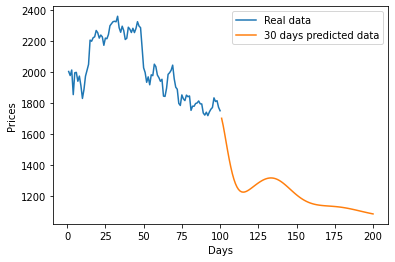

In [60]:
plt.plot(day_new,scaler.inverse_transform(df1[1137:]),label='Real data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='30 days predicted data')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()

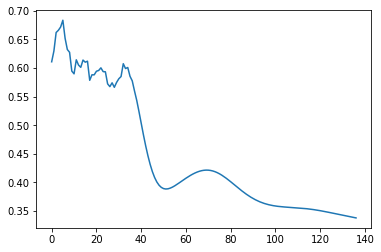

In [61]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

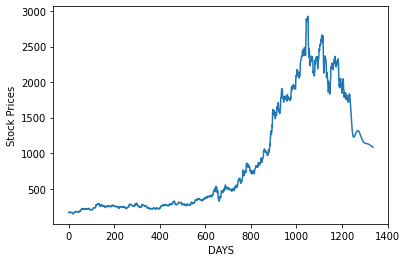

In [62]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
plt.xlabel("DAYS")
plt.ylabel("Stock Prices")
plt.show()